# Value Chain comparison map for all countries

This Python script is designed to create a value chain comparison map for European countries using geopandas and matplotlib. It reads in data from CSV files, merges it with geographical data, and visualizes various metrics for each country on a series of subplots. Below is a detailed description of the code:

## Import libraries

The script begins by importing necessary libraries: pandas, numpy, matplotlib.pyplot, seaborn, geopandas, and shapely.geometry.Polygon.

## Load Data:

It loads two datasets from CSV files: merged_data.csv and merged_per_million.csv. The former contains general data, while the latter contains data normalized per million inhabitants.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon

# Load the data
merged_df = pd.read_csv("merged_data/merged_data.csv")
per_million_df = pd.read_csv("merged_data/merged_per_million.csv")
per_million_df

,Output T/year,Total consumption,Number Stations,FCEV Fleet,Worker,Number of Companies,Number of Valleys,Count Research,Value (€/kg),Country
0,12682.617893,12753.204588,1.317990,6.809616,175.622190,16.694542,0.219665,0.439330,7.842083,Austria
1,35019.737601,32204.006858,0.851586,9.367445,2243.247690,7.153322,0.170317,0.510952,7.071683,Belgium
2,18793.191001,18796.138133,0.000000,0.000000,162.693421,1.550938,0.000000,0.310188,5.746098,Bulgaria
3,16182.424930,16187.345053,0.519360,0.000000,92.186386,3.116160,0.000000,0.259680,7.431894,Croatia
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.859940,Cyprus
5,9592.780982,9615.263401,0.738857,1.108286,180.742993,3.417216,0.000000,0.092357,7.045749,Czech Republic
6,4206.017425,4262.760965,0.842793,39.442718,544.781476,7.753697,0.505676,0.842793,7.575090,Denmark
7,12.342826,12.342826,0.000000,1.464253,0.000000,7.321266,0.732127,0.732127,7.154682,Estonia
8,31710.413241,31696.273208,0.000000,0.359456,559.492593,6.829656,0.359456,0.898639,6.982303,Finland
9,8109.119903,8064.022372,1.598874,12.658975,1233.773318,12.145575,0.058674,0.146686,6.947785,France


### Load and Filter Geographic Data
It loads a map of the world using geopandas and filters it to retain only European countries, excluding Russia. Based on the gathered and cleaned data, we can now create a comparison map that showcases important value chain steps in comparison to each other for all countries.

C:\Users\andre.premstaller\AppData\Local\Temp\ipykernel_17820\2456959843.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


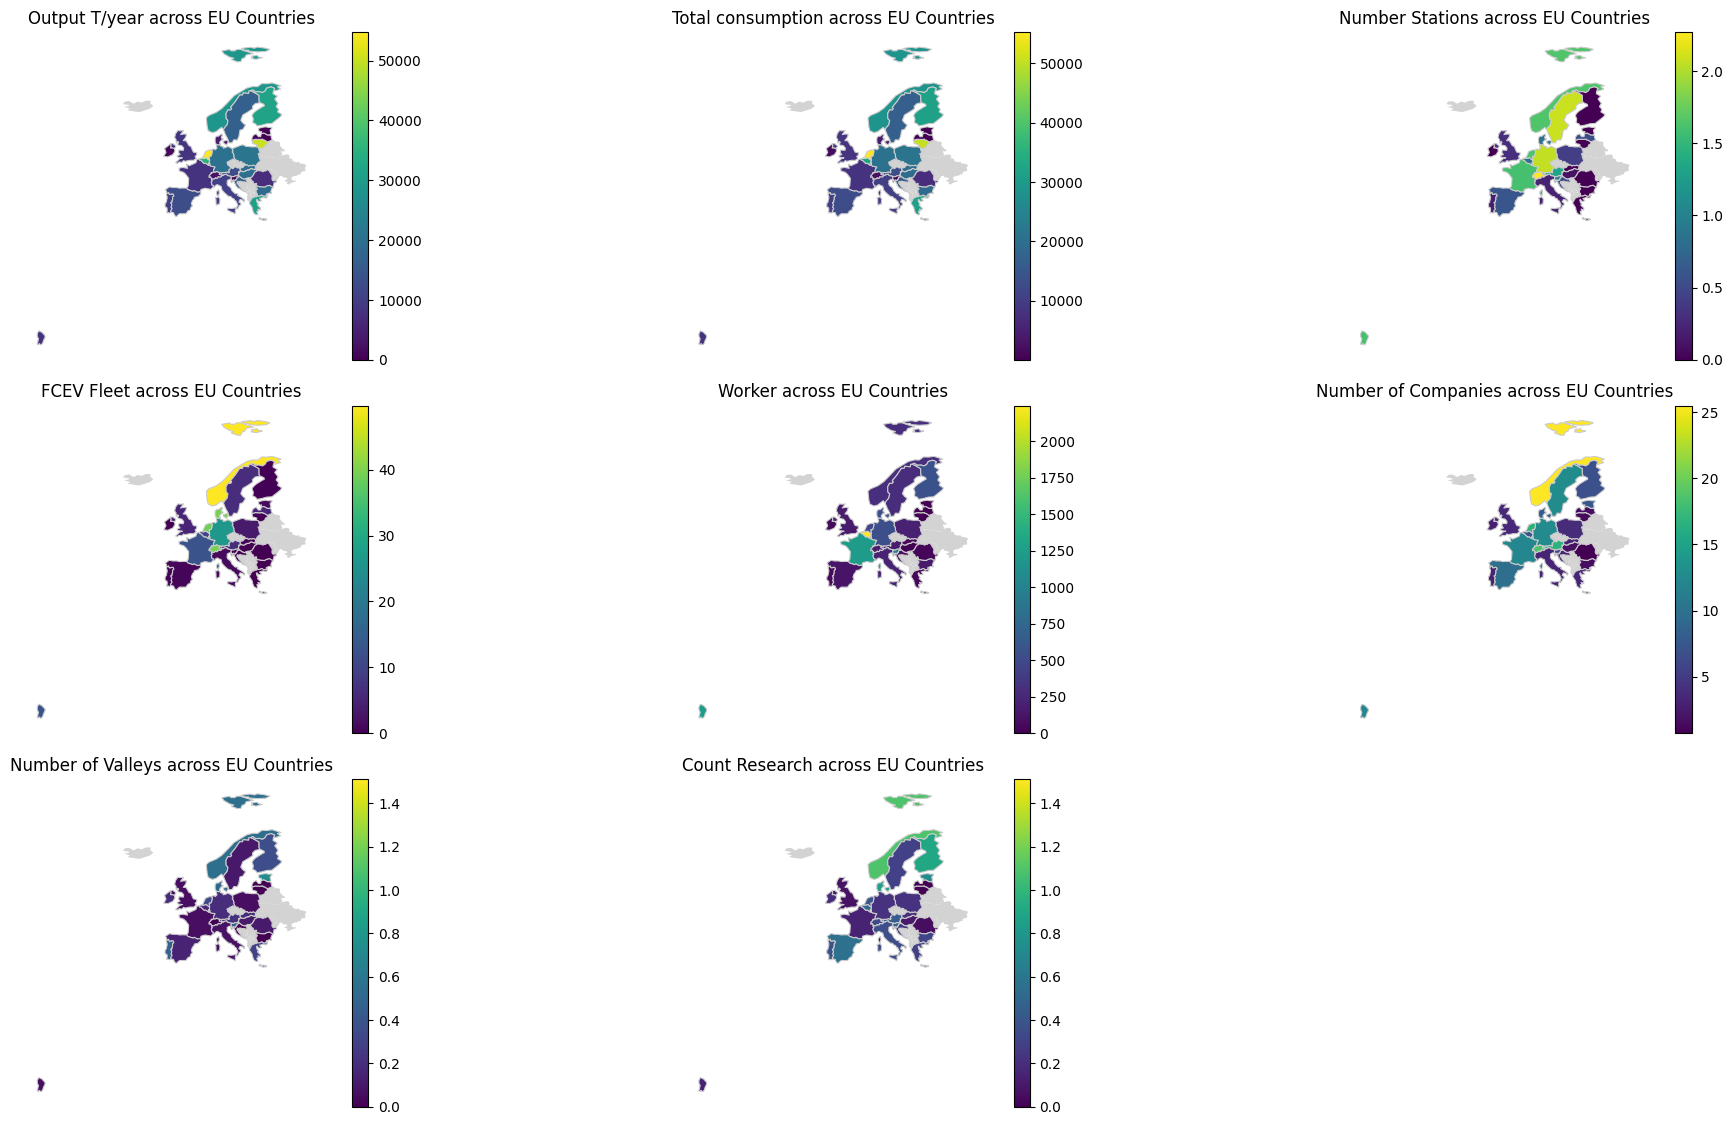

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for European countries
europe = world[(world.continent == 'Europe') & (world.name != 'Russia')]

# Ensure 'Country' column in merged_df matches the 'name' column in europe DataFrame
# For simplicity, let's assume country names match directly. Otherwise, you'll need to map names correctly.
europe = europe.rename(columns={'name': 'Country'})
eu_merged = europe.set_index('Country').join(per_million_df.set_index('Country'))

# Columns to plot
columns_to_plot = ['Output T/year', 'Total consumption', 'Number Stations', 'FCEV Fleet', 'Worker', 'Number of Companies', 'Number of Valleys', 'Count Research']
columns_to_plot
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
axes = axes.flatten()

# Plot each column in the respective subplot
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    base = eu_merged.plot(ax=ax, color='lightgrey')  # Countries without data will be light grey
    eu_merged.plot(column=column, cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(f'{column} across EU Countries')
    ax.set_axis_off()  # Turn off the axis

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The initial maps do not work for the master thesis and are adapted:

### Adjust Geographic Data
The script excludes territories outside of continental Europe (e.g., French Guiana and Corsica) from the map to keep it small enough for analysis. It processes the coordinates of mainland France to replace its geometry in the dataset, ensuring that only continental Europe is displayed.

### Columns to Plot
The script defines a list of columns to visualize: ['Output T/year', 'Total consumption', 'Number Stations', 'FCEV Fleet', 'Worker', 'Number of Companies', 'Number of Valleys', 'Count Research'].

### Create Subplots
It creates a series of subplots (3 rows by 4 columns) using matplotlib to visualize each of the specified columns. Each subplot will represent one of the metrics across European countries.

### Plot Data on Subplots
The script iterates over the columns to plot, and for each column, it:

- Plots the base map of Europe with countries without data shown in light grey.
- Plots the data for the respective column using a color map (viridis), with legend and edge colors for clarity.
- Sets the title for each subplot and turns off the axis for a cleaner look.

C:\Users\andre.premstaller\AppData\Local\Temp\ipykernel_17820\2952088792.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


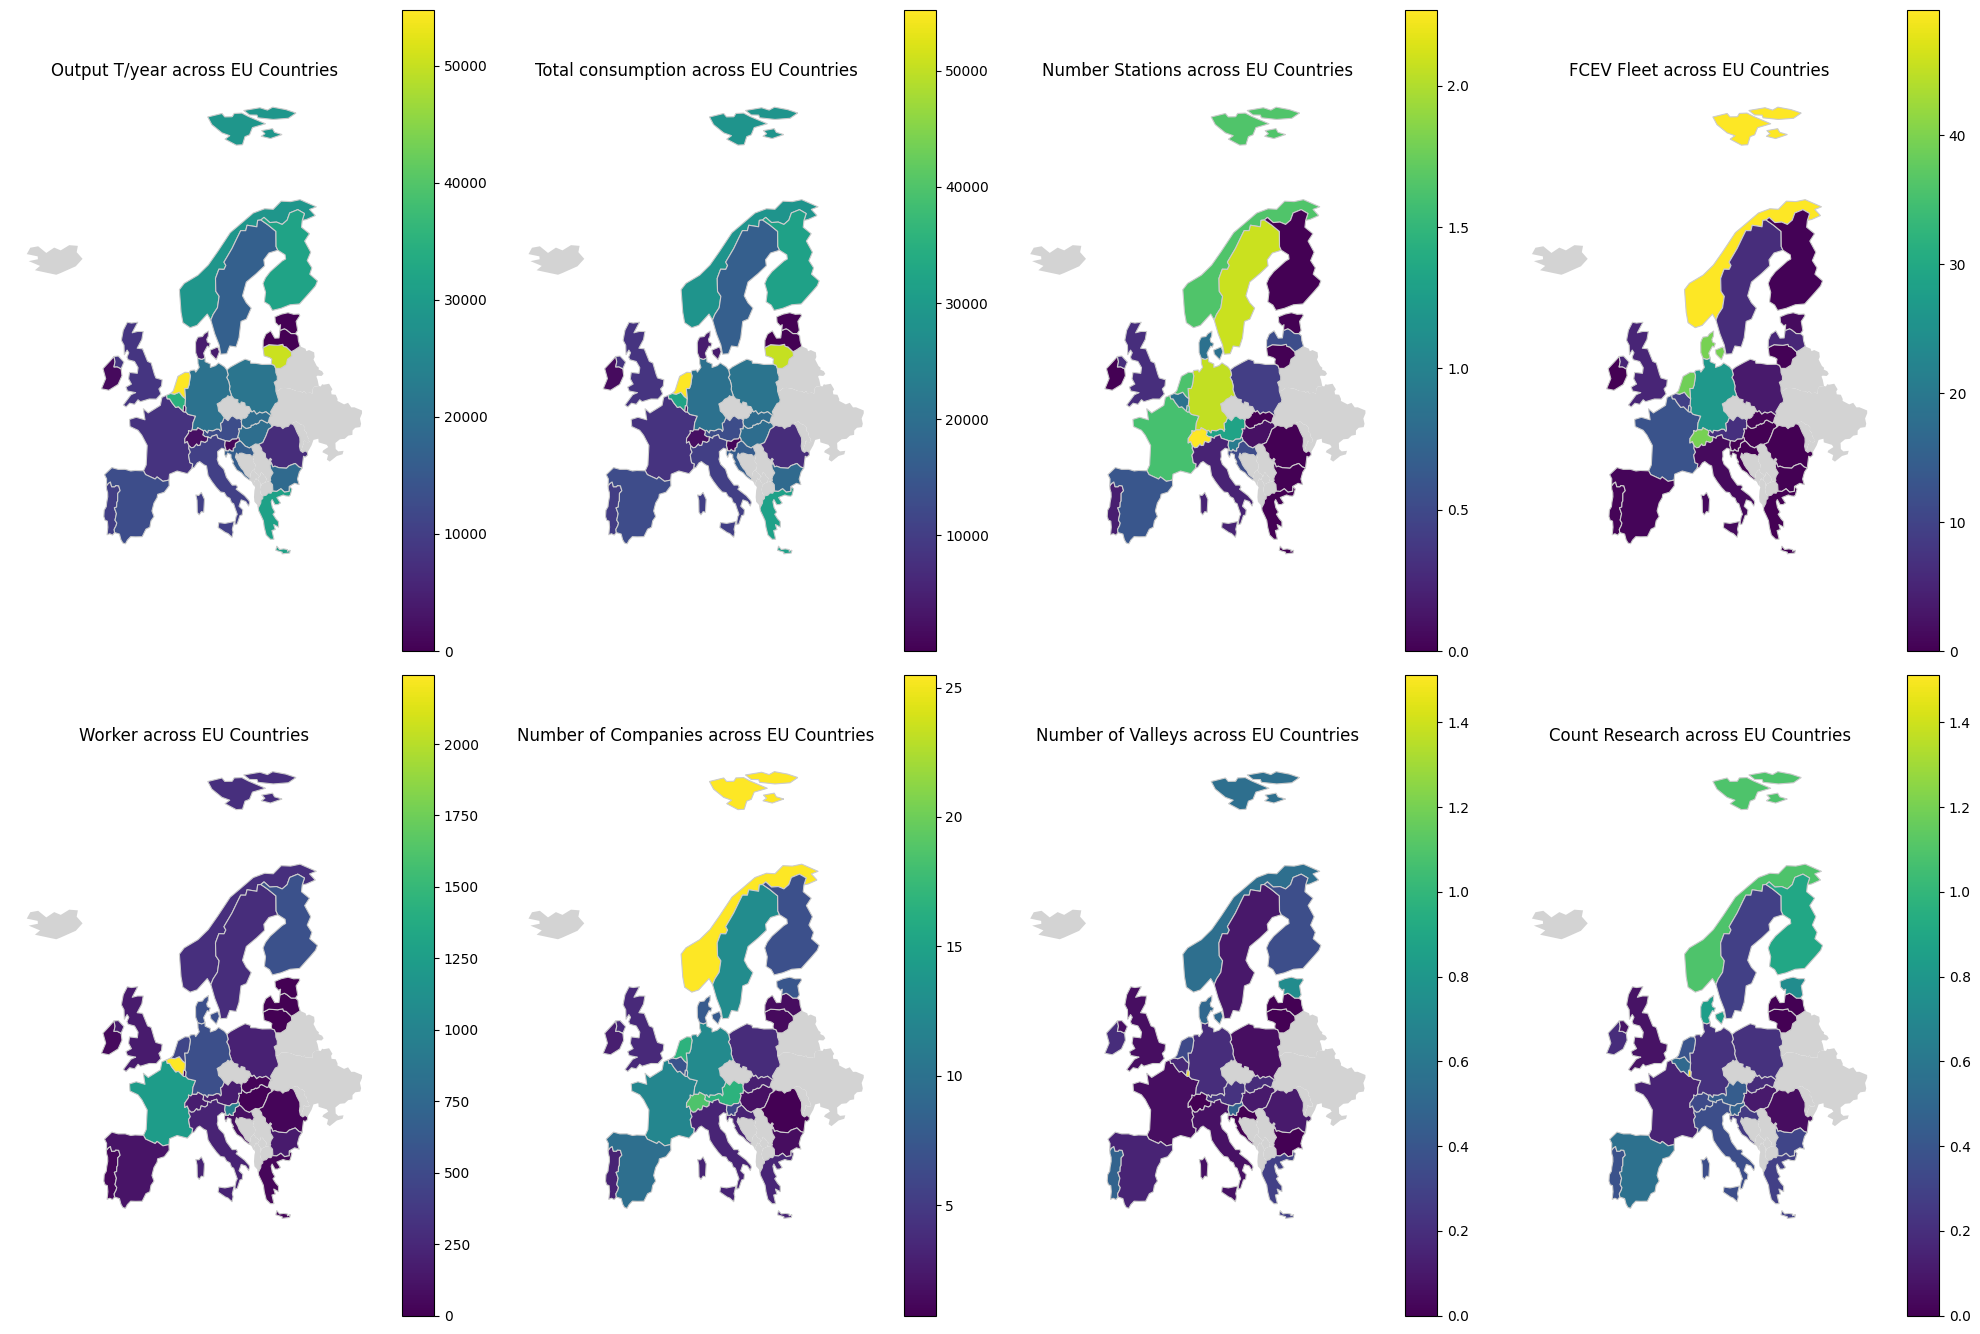

In [3]:


# Load Europe map data from the geopandas library
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[(world.continent == 'Europe') & (world.name != 'Russia')]

# Exclude French Guiana and Corsica from the map
tmp = [x.replace(')','') for x in str(europe.loc[europe['name'] == 'France', 'geometry'].values[0]).split('((')[1:]][1]
tmp2 = [x.split(' ') for x in tmp.split(', ')][:-1]
tmp3 = [(float(x[0]), float(x[1])) for x in tmp2]
France_mainland = Polygon(tmp3)
europe.loc[europe['name'] == 'France', 'geometry'] = France_mainland

# Ensure 'Country' column in merged_df matches the 'name' column in europe DataFrame
# For simplicity, let's assume country names match directly. Otherwise, you'll need to map names correctly.
europe = europe.rename(columns={'name': 'Country'})
# Assuming per_million_df is your DataFrame with relevant data
eu_merged = europe.set_index('Country').join(per_million_df.set_index('Country'))

# Columns to plot
columns_to_plot = ['Output T/year', 'Total consumption', 'Number Stations', 'FCEV Fleet', 'Worker', 'Number of Companies', 'Number of Valleys', 'Count Research']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 20))
axes = axes.flatten()

# Plot each column in the respective subplot
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    base = eu_merged.plot(ax=ax, color='lightgrey')  # Countries without data will be light grey
    eu_merged.plot(column=column, cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(f'{column} across EU Countries')
    ax.set_axis_off()  # Turn off the axis

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
fig.savefig('europe_map.png')